In [1]:
# Core
import datetime
import os
import glob
import tempfile
import sys
import pickle
import copy

# Analysis 
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

# Debugging 
import pdb, traceback
%load_ext line_profiler

# Radar Tools
import pyart
import tint
from tint import animate

# CPOL convenience functions
import CPOL_func as cf


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/home/563/esh563/pyart/pyart/graph/cm.py:104: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'red' in spec:
/home/563/esh563/pyart/pyart/graph/cm_colorblind.py:32: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'red' in spec:


In [2]:
filenames = cf.load_wet_seasons(years=list(range(1999,2010)))

Gathering files.
Gathering files.
Gathering files.
Gathering files.
Gathering files.
Gathering files.
Gathering files.


In [2]:
# def test():
# filenames = cf.CPOL_files_from_datetime_list(
#     np.arange(np.datetime64('2006-02-10 09:00'), 
#               np.datetime64('2006-02-10 15:00'), 
#               np.timedelta64(10, 'm'))
# )[0]

# Generate grid generator 
# Note generators produce iterators
# These are alternative to using lists and looping
grids = (pyart.io.read_grid(fn, include_fields = 'reflectivity')
         for fn in filenames)

with open('/g/data/w40/esh563/CPOL_analysis/TINT_tracks/circ_b_ind_set.pkl', 
          'rb') as f:
    b_ind_set = pickle.load(f)

# Define settings for tracking
settings = {
    'MIN_SIZE' : [40, 400, 800], # square km
    'FIELD_THRESH' : ['convective', 20, 15], # DbZ
    'ISO_THRESH' : [10, 10, 10], # DbZ
    'GS_ALT' : 3000,
    'SEARCH_MARGIN' : 10000, # m. This is just for object matching step:
    # does not affect flow vectors.
    'FLOW_MARGIN' : 40000, # m. Margin around object over which to
    # perform phase correlation.
    'LEVELS' : np.array( # m
        [[3000, 3500], 
         [3500, 7500],
         [7500, 10000]]
    ),
    'TRACK_INTERVAL' : 0,
    'BOUNDARY_GRID_CELLS' : b_ind_set,
    'UPDRAFT_START': 3000
}

tracks_obj  = tint.Cell_tracks()

for parameter in ['MIN_SIZE', 'FIELD_THRESH', 'GS_ALT', 'LEVELS', 
                  'TRACK_INTERVAL', 'ISO_THRESH', 'SEARCH_MARGIN',
                  'FLOW_MARGIN', 'BOUNDARY_GRID_CELLS', 'UPDRAFT_START'
                 ]:
    tracks_obj.params[parameter] = settings[parameter]

# Calculate tracks
# %lprun -T lprof0 -f get_filtered_frame_steiner tracks_obj.get_tracks(grids)
tracks_obj.get_tracks(grids)

# Create directory for figures
dt=str(datetime.datetime.now())[0:-7]
dt=dt.replace(" ", "_")
dt=dt.replace(":", "_")
dt=dt.replace("-", "")

out_file_name = ('/g/data/w40/esh563/CPOL_analysis/TINT_tracks/'
                 + 'tracks_obj_test.pkl'.format(dt))

with open(out_file_name, 'wb') as f:
    pickle.dump(tracks_obj, f)
        
#     return tracks_obj
        
# if __name__ == '__main__':
#     try:
#         tracks_obj = test()
#     except:
#         extype, value, tb = sys.exc_info()
#         traceback.print_exc()
#         pdb.post_mortem(tb)
        
# print(open('lprof0', 'r').read())

Gathering files.


KeyboardInterrupt: Failed in nopython mode pipeline (step: nopython mode backend)
Failed in nopython mode pipeline (step: nopython mode backend)


In [3]:
with open('/g/data/w40/esh563/CPOL_analysis/TINT_tracks/tracks_obj_test.pkl', 'rb') as f:
    tracks_obj = pickle.load(f)

In [4]:
def test():
    lon_min = 131.0 - 1.6
    lon_max = 131.0 + 1.6

    lat_max = -12.2 + 1.6
    lat_min = -12.2 - 1.6

    [filenames, start_time, end_time] = cf.CPOL_files_from_datetime_list(
        np.arange(np.datetime64('2006-02-10 10:00'), 
                  np.datetime64('2006-02-10 11:00'), 
                  np.timedelta64(10, 'm'))
    )
    
    tracks_obj_temp = copy.deepcopy(tracks_obj)
#     tracks_obj_temp.tracks = tracks_obj_temp.tracks[sub_cond]
#     tracks_obj_temp.system_tracks = tracks_obj_temp.system_tracks[sub_cond_sys]
    
#     filenames, start_time, end_time = cf.CPOL_files_from_TINT_obj(
#         tracks_obj_temp, '5732'
#     )

    # Generate grid generator 
    # Note generators produce iterators
    # These are alternative to using lists and looping
    grids = (pyart.io.read_grid(fn, include_fields = 'reflectivity')
             for fn in filenames)

    # Create directory for figures
    dt=str(datetime.datetime.now())[0:-7]
    dt=dt.replace(" ", "_")
    dt=dt.replace(":", "_")
    dt=dt.replace("-", "")

    base_path = '/g/data/w40/esh563/CPOL_analysis/figures/TINT/'
    out_path = base_path + dt + '_tint_CPOL_anim'

    animate(tracks_obj_temp, grids, out_path,
            start_datetime = start_time,
            end_datetime = end_time,
            lat_lines=np.arange(lat_min, lat_max, .2),
            lon_lines=np.arange(lon_min, lon_max, .2),
            tracers=False, keep_frames=False, dpi=100, alt_low=3000,
            alt_high=9500, scan_boundary=False, ellipses=True)
    
if __name__ == '__main__':
    try:
        test()
    except:
        extype, value, tb = sys.exc_info()
        traceback.print_exc()
        pdb.post_mortem(tb)

Gathering files.
Animating from 2006-02-10T10:00 to 2006-02-10T10:50.
Plotting scan at 2006-02-10T10:40:09.
Reached 2006-02-10T10:50.
Breaking loop.

Creating GIF - may take a few minutes.


In [17]:
def test():
    uid = '13750'

#     filenames, start_time, end_time = cf.CPOL_files_from_TINT_obj(
#         tracks_obj, uid
#     )
    
    [filenames, start_time, end_time] = cf.CPOL_files_from_datetime_list(
        np.arange(np.datetime64('2006-01-06 06:20'), 
        np.datetime64('2006-01-06 07:10'), 
        np.timedelta64(10, 'm')))

    grids = (pyart.io.read_grid(fn) for fn in filenames)  # refresh grid generator

    # Create directory for figures
    dt=str(datetime.datetime.now())[0:-7]
    dt=dt.replace(" ", "_")
    dt=dt.replace(":", "_")
    dt=dt.replace("-", "")
    
    base_path = '/g/data/w40/esh563/CPOL_analysis/figures/TINT/'
    out_path = base_path + dt + '_tint_CPOL_lagrangian'
    animate(tracks_obj, grids, out_path, style='updraft', uid=uid, 
            alt_low=3000, alt_high=10000, keep_frames=False, dpi=100)
    
if __name__ == '__main__':
    try:
        test()
    except:
        extype, value, tb = sys.exc_info()
        traceback.print_exc()
        pdb.post_mortem(tb)

Gathering files.
Animating 43 frames
Object not yet initiated at 2006-01-06T06:20:09.
Moving to next grid.
Object not yet initiated at 2006-01-06T06:30:09.
Moving to next grid.
Object not yet initiated at 2006-01-06T06:40:09.
Moving to next grid.
Object not yet initiated at 2006-01-06T06:50:09.
Moving to next grid.
Object not yet initiated at 2006-01-06T07:00:09.
Moving to next grid.
Grid generator is empty.


In [4]:
# Let's filter by tilt direction and magnitude, velocity magnitude
# and significant area.
forward_tilt = ((-45 <= tracks_obj.system_tracks['sys_rel_tilt_dir'])
                & (tracks_obj.system_tracks['sys_rel_tilt_dir'] <= 45))
backward_tilt = ((-135 >= tracks_obj.system_tracks['sys_rel_tilt_dir'])
                | (tracks_obj.system_tracks['sys_rel_tilt_dir'] >= 135))
left_tilt = ((45 <= tracks_obj.system_tracks['sys_rel_tilt_dir'])
                & (tracks_obj.system_tracks['sys_rel_tilt_dir'] <= 135))
right_tilt = ((-135 <= tracks_obj.system_tracks['sys_rel_tilt_dir'])
                & (tracks_obj.system_tracks['sys_rel_tilt_dir'] <= -45))
sig_tilt_mag = (tracks_obj.system_tracks['tilt_mag'] >= 20000)
vel_mag = np.sqrt(tracks_obj.system_tracks['u']**2 
                  + tracks_obj.system_tracks['v']**2)
sig_vel_mag = ((vel_mag >= 5) & (vel_mag <= 40))
eccentricity_mag = tracks_obj.system_tracks['eccentricity'] > .85
# Note for CPOL 2.5 km, total scan area is only 66052 km^2. This makes 
# traditional MCS definitions of area > 30000 km^2 difficult to apply, 
# and still coherently calculate tilt. 
sig_area = ((tracks_obj.system_tracks['proj_area'] >= 4000) & 
            (tracks_obj.system_tracks['proj_area'] <= 50000))
not_border = (tracks_obj.system_tracks['touch_border']*6.25 / tracks_obj.system_tracks['proj_area']) < 0.01

tracks_0 = tracks_obj.tracks[['touch_border', 'proj_area']].xs(
    0, level='level'
)
not_border_0 = (tracks_0['touch_border'] * 6.25 / tracks_0['proj_area']) < 0.01

In [5]:
# Let's find the cells that were tracked for the most frames.
sub_cond_sys = sig_tilt_mag & sig_vel_mag & sig_area & not_border & not_border_0 & forward_tilt & eccentricity_mag
sub_cond = sub_cond_sys.append([sub_cond_sys]*2).sort_index(sort_remaining=True)
levels = np.array([0,1,2]*len(sub_cond_sys))

sub_cond = sub_cond.to_frame()
sub_cond.insert(0, 'level', levels)
sub_cond = sub_cond.reset_index()

sub_cond = sub_cond.set_index(['scan', 'time', 'level', 'uid'])
sub_cond = sub_cond.ix[:,0]
# tracks_obj.tracks[sub_cond]
tracks_obj.system_tracks[sub_cond_sys].groupby(level='uid').size().sort_values(ascending=False)[:20]

uid
5732     6
11889    6
13339    6
2737     5
951      5
5563     5
7479     5
4291     5
366      4
13292    4
6578     4
11001    4
5729     4
9034     4
9183     4
4310     4
931      4
674      4
10359    4
3742     3
dtype: int64

In [8]:
tracks_obj.system_tracks[sub_cond_sys].xs('1618', level='uid')['proj_area']

scan   time               
13541  2000-02-08 14:40:00    18743.75
13542  2000-02-08 14:50:01    17862.50
13543  2000-02-08 15:00:01    18200.00
13544  2000-02-08 15:10:01    18693.75
13545  2000-02-08 15:20:01    18037.50
13546  2000-02-08 15:30:01    17356.25
13547  2000-02-08 15:40:01    16556.25
13549  2000-02-08 16:00:00    16962.50
13550  2000-02-08 16:10:01    15606.25
Name: proj_area, dtype: float64

# Calculate Some Statistics

In [20]:
subset_logic = sig_area & not_border & sig_vel_mag & sig_tilt_mag & not_border_0

sub_tracks = tracks_obj.system_tracks[subset_logic]
sub_uids = list(sorted(set([int(sub_tracks.index.values[i][2]) for i in range(len(sub_tracks))])))
sub_uids = [str(i) for i in sub_uids]

MCS_lengths = [len(sub_tracks.xs(i, level='uid').reset_index(level='time').index.values) for i in sub_uids]

max_MCS = max(MCS_lengths)

# Create 3 lists with lengths the lifetime of longest object.
[TS, LS, PS] = [np.zeros(80) for i in range(3)]

for i in sub_uids:
    obj = sub_tracks.xs(i, level='uid').reset_index(level='time')
    scans = obj.index.values
    scan_label = scans - min(scans)
    tilts = obj['sys_rel_tilt_dir']

    forward_tilt = ((-45 <= tilts) & (tilts <= 45))
    backward_tilt = ((-135 >= tilts) | (tilts >= 135))

    fwd_inds = scan_label[np.argwhere(forward_tilt).flatten().tolist()].tolist()
    bwd_inds = scan_label[np.argwhere(backward_tilt).flatten().tolist()].tolist()
    pll_inds = scan_label[np.argwhere(~backward_tilt & ~forward_tilt).flatten().tolist()].tolist()

    TS[bwd_inds] += 1
    LS[fwd_inds] += 1
    PS[pll_inds] += 1

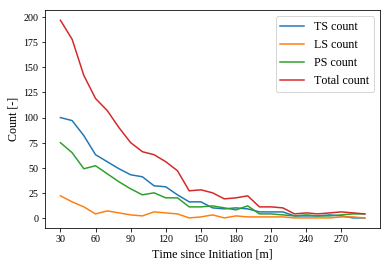

In [21]:
plt.plot(np.arange(30,300,10), TS[3:30], label='TS count')
plt.plot(np.arange(30,300,10), LS[3:30], label='LS count')
plt.plot(np.arange(30,300,10), PS[3:30], label='PS count')
plt.plot(np.arange(30,300,10), (TS+PS+LS)[3:30], label='Total count')
plt.xticks(np.arange(30,300,30))
plt.ylabel('Count [-]')
plt.xlabel('Time since Initiation [m]')
plt.legend()
plt.savefig('/g/data/w40/esh563/CPOL_analysis/figures/TINT/counts.png')

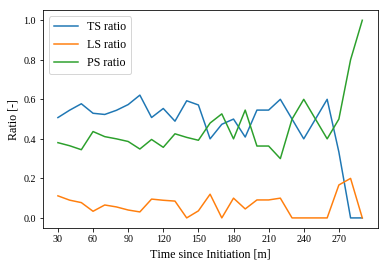

In [22]:
tot = (TS+PS+LS)

plt.plot(np.arange(30,300,10), (TS/tot)[3:30], label='TS ratio')
plt.plot(np.arange(30,300,10), (LS/tot)[3:30], label='LS ratio')
plt.plot(np.arange(30,300,10), (PS/tot)[3:30], label='PS ratio')
plt.xticks(np.arange(30,300,30))
plt.ylabel('Ratio [-]')
plt.xlabel('Time since Initiation [m]')
plt.legend()
# Note that we don't really know the start times of the systems!
plt.savefig('/g/data/w40/esh563/CPOL_analysis/figures/TINT/ratios.png')